# 🔍 **Unsupervised learning approach : Clustering** 

## 1) เตรียมข้อมูล 📦

### import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# เปิดไฟล์
import pandas as pd
df_58 = pd.read_excel('/content/drive/MyDrive/WIL/mental/data/4.Calculate/mental_y58_data_calculated.xlsx')
df_58 = df_58.rename(columns={"Province": "NAME_1"})

df_59 = pd.read_excel('/content/drive/MyDrive/WIL/mental/data/4.Calculate/mental_y59_data_calculated.xlsx')
df_59 = df_59.rename(columns={"Province": "NAME_1"})

df_60 = pd.read_excel('/content/drive/MyDrive/WIL/mental/data/4.Calculate/mental_y60_data_calculated.xlsx')
df_60 = df_60.rename(columns={"Province": "NAME_1"})

df_61 = pd.read_excel('/content/drive/MyDrive/WIL/mental/data/4.Calculate/mental_y61_data_calculated.xlsx')
df_61 = df_61.rename(columns={"Province": "NAME_1"})

df_62 = pd.read_excel('/content/drive/MyDrive/WIL/mental/data/4.Calculate/mental_y62_data_calculated.xlsx')
df_62 = df_62.rename(columns={"Province": "NAME_1"})

df_63 = pd.read_excel('/content/drive/MyDrive/WIL/mental/data/4.Calculate/mental_y63_data_calculated.xlsx')
df_63 = df_63.rename(columns={"Province": "NAME_1"})

df_64 = pd.read_excel('/content/drive/MyDrive/WIL/mental/data/4.Calculate/mental_y64_data_calculated.xlsx')
df_64 = df_64.rename(columns={"Province": "NAME_1"})

### Dataset for K-prototype clustering

In [ ]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
df_list = [df_58, df_59, df_60, df_61, df_62, df_63, df_64]

for i in range(6) :
  if i == 0 :
    df1 = df_list[i]
    df2 = df_list[i + 1]
    dataset_all = df1.append(df2)
  else :
    df2 = df_list[i + 1]
    dataset_all = dataset_all.append(df2)

dataset_all = dataset_all.drop(columns=['NAME_1','Addicted to Amphetamine','Other Mental Illnesses','Bipolar Disorder',
              'Game Addiction(Older than 15 years old)','Game Addiction(Younger than 15 years old)',
              'Other Psychosis','Male_population', 'Women_population', 'Total_population'])

disorder = dataset_all.columns
dataset_all = dataset_all.transpose()

#dataset_all = dataset_all.apply(lambda x : (x - dataset_all.mean())/dataset_all.std(), axis=1)
#dataset_all = dataset_all.fillna(0)
dataset_all = pd.DataFrame(std_scaler.fit_transform(dataset_all))

dataset_all['disorder'] = disorder
dataset_all.index = range(1, 13)

dataset_all

,0,1,2,3,4,5,6,7,8,9,...,530,531,532,533,534,535,536,537,538,disorder
1,-0.556333,-0.559654,-0.555187,-0.562581,-0.644531,-0.570839,-0.517780,-0.614473,-0.505951,-0.637137,...,-0.746333,-0.674347,-0.844933,-0.928398,-0.722754,-0.415688,-0.704189,-0.696691,-0.814259,Dementia
2,-0.500089,-0.556880,-0.518699,-0.558473,-0.274159,-0.566921,-0.476162,-0.475806,-0.372199,-0.386981,...,0.214747,-0.330146,0.287194,0.459857,0.310549,0.782996,0.050186,-0.724657,0.194746,Alcoholic
3,-0.537250,-0.548557,-0.542309,-0.562581,-0.248633,-0.550464,-0.480467,-0.458001,-0.592997,-0.483731,...,-0.730491,-0.824075,0.015262,0.504561,-0.164020,-0.868482,-0.666153,-0.719330,-0.794103,Addicted to other drugs
4,2.527059,0.962556,2.110568,2.391140,2.562170,2.302100,0.935999,1.883935,2.849011,1.401584,...,1.075494,0.945119,0.792211,0.979072,1.817407,0.542507,0.785543,1.517895,1.810815,Schizophrenia
5,0.605714,2.000174,1.003056,1.370963,1.175422,1.264519,0.799662,1.322418,0.521078,1.320306,...,2.117103,1.988048,2.293389,1.439580,1.476691,1.962891,2.716911,1.647068,1.648378,Depression
6,1.619115,2.064910,1.913104,1.262783,1.074546,1.494918,2.849735,1.931527,0.975943,2.311556,...,1.177146,1.735921,0.925403,1.701342,1.059415,1.549552,0.496049,1.720310,1.038944,Anxiety Disorder
7,-0.574411,-0.562429,-0.600260,-0.565320,-0.656558,-0.588080,-0.530696,-0.605228,-0.561151,-0.636483,...,-0.994524,-0.762119,-0.980899,-0.908470,-0.808441,-0.631751,-0.759129,-0.670058,-0.692135,Intellectual Disabilities
8,-0.575416,-0.565203,-0.630309,-0.568058,-0.678157,-0.584162,-0.555811,-0.605571,-0.628027,-0.599003,...,-0.675044,-0.832680,-0.536928,-1.117449,-1.018346,-1.013150,-0.661927,-0.698023,-0.982624,Learning Disabilities
9,-0.599520,-0.564278,-0.610991,-0.565320,-0.683556,-0.591215,-0.542177,-0.624402,-0.593527,-0.658927,...,-0.908713,-0.769003,-1.102991,-1.036119,-0.918971,-0.954907,-0.892254,-0.692696,-0.941126,Autistic Disorder
10,-0.603538,-0.565203,-0.636748,-0.568058,-0.691410,-0.595917,-0.559399,-0.628511,-0.665181,-0.674180,...,-0.321240,-0.410173,-0.595199,-0.377944,-0.823144,-0.729449,0.024829,-0.406385,-0.026974,ADHD


### Dataset for K-mean clustering

In [ ]:
dataset = dataset_all.drop(columns = 'disorder')

## 2)K-prototype algorithm 📚


### install and import neccessary module

In [ ]:
!pip install kmodes
!pip install ggplot
!pip install plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 25.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
from kmodes.kprototypes import KPrototypes
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore', category = FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### find optimal K

In [ ]:
dfMatrix = dataset_all.to_numpy()

In [ ]:
from sklearn.metrics import silhouette_score
K = []
score = []
for k in range(2,6):
    labels = KMeans(n_clusters=k).fit(dataset_pca).predict(dataset_pca)
    s = silhouette_score(dataset_pca, labels)
    print("K = {}, Silhouette score = {:1.4f}".format(k, s))
    K.append(k)
    score.append(s)
silhouette_df = pd.DataFrame({"K" : K, "Silhouette score" : score})
silhouette_df.to_csv("silhouette_score.csv")
silhouette_df

NameError: ignored

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [539])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 6), 'Cost':cost})

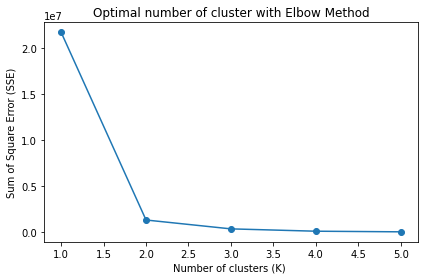

In [ ]:
sse = {}
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k).fit(df_cost)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Optimal number of cluster with Elbow Method')
plt.xlabel("Number of clusters (K) ")
plt.ylabel("Sum of Square Error (SSE)")
plt.tight_layout();
plt.savefig('elbow_output.png', dpi=300, format='png', bbox_inches='tight')

plt.show()

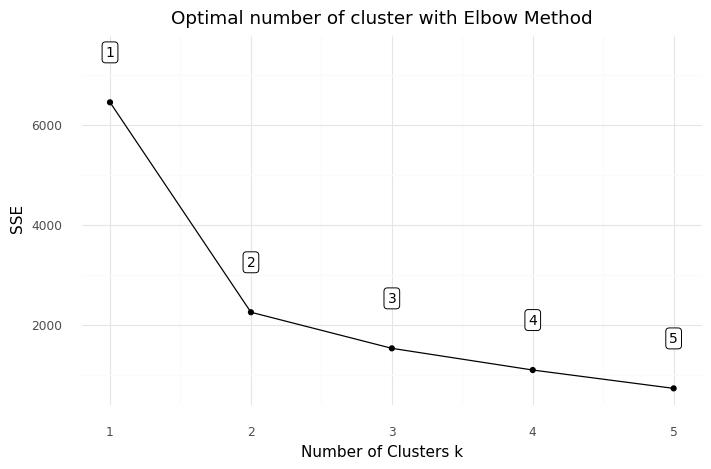

<ggplot: (8750735978549)>

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('SSE')+
    theme_minimal()
)

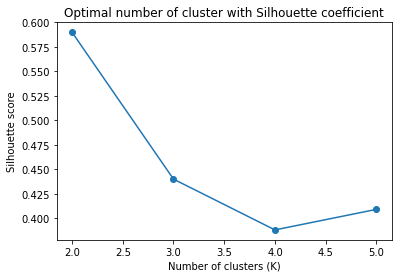

In [ ]:
import matplotlib.pyplot as plt

Silhouette_score = [0.5900,0.4399,0.3880,0.4090]
k = [2,3,4,5]

plt.plot(k, Silhouette_score, marker='o')
plt.title('Optimal number of cluster with Silhouette coefficient')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
#plt.grid(True)
plt.savefig('Silhouette_score_output.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

### clustering

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [539])

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=uint16)

In [ ]:
# Add the cluster to the dataframe
cluster_data = dataset_all.copy()
cluster_data['Cluster Labels'] = kprototype.labels_

In [ ]:
summary_all = cluster_data.iloc[: , [539,540]]

summary_all.drop(index = 10, inplace=True)
summary_all = summary_all.sort_values(by='Cluster Labels')
summary_all.to_csv('k_prototype_2_cluster.csv')
summary_all

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,disorder,Cluster Labels
1,Dementia,0
2,Alcoholic,0
3,Addicted to other drugs,0
7,Intellectual Disabilities,0
8,Learning Disabilities,0
9,Autistic Disorder,0
11,Self-Harm,0
12,Epilepsy,0
4,Schizophrenia,1
5,Depression,1


In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [539])

array([2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 0], dtype=uint16)

In [ ]:
# Add the cluster to the dataframe
cluster_data2 = dataset_all.copy()
cluster_data2['Cluster Labels'] = kprototype.labels_

In [ ]:
summary_all2 = cluster_data2.iloc[: , [539,540]]

summary_all2.drop(index = 10, inplace=True)
summary_all2 = summary_all2.sort_values(by='Cluster Labels')
summary_all2.to_csv('k_prototype_3_cluster.csv')
summary_all2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,disorder,Cluster Labels
2,Alcoholic,0
3,Addicted to other drugs,0
12,Epilepsy,0
4,Schizophrenia,1
5,Depression,1
6,Anxiety Disorder,1
1,Dementia,2
7,Intellectual Disabilities,2
8,Learning Disabilities,2
9,Autistic Disorder,2


## 3) hierarchical clustering 📖

### Dataset 2015-2021

#### Dataset 58

In [ ]:
dataset_58

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,disorder
1,-0.556,-0.560,-0.555,-0.563,-0.645,-0.571,-0.518,-0.614,-0.506,-0.637,...,-0.663,-0.572,-0.528,-0.547,-0.563,-0.564,-0.611,-0.539,-0.527,Dementia
2,-0.500,-0.557,-0.519,-0.558,-0.274,-0.567,-0.476,-0.476,-0.372,-0.387,...,-0.458,-0.571,-0.559,-0.372,-0.509,-0.559,-0.494,-0.537,-0.529,Alcoholic
3,-0.537,-0.549,-0.542,-0.563,-0.249,-0.550,-0.480,-0.458,-0.593,-0.484,...,-0.107,-0.569,-0.549,-0.388,-0.525,-0.562,-0.596,-0.512,-0.524,Addicted to other drugs
4,2.527,0.963,2.111,2.391,2.562,2.302,0.936,1.884,2.849,1.402,...,2.286,1.354,2.529,1.396,1.654,1.023,1.857,1.491,1.994,Schizophrenia
5,0.606,2.000,1.003,1.371,1.175,1.265,0.800,1.322,0.521,1.320,...,1.269,1.734,0.678,-0.023,0.841,1.803,1.692,0.620,0.445,Depression
6,1.619,2.065,1.913,1.263,1.075,1.495,2.850,1.932,0.976,2.312,...,1.359,2.054,1.578,2.785,2.402,2.210,1.632,2.625,2.307,Anxiety Disorder
7,-0.574,-0.562,-0.600,-0.565,-0.657,-0.588,-0.531,-0.605,-0.561,-0.636,...,-0.724,-0.574,-0.553,-0.527,-0.605,-0.562,-0.604,-0.541,-0.538,Intellectual Disabilities
8,-0.575,-0.565,-0.630,-0.568,-0.678,-0.584,-0.556,-0.606,-0.628,-0.599,...,-0.567,-0.574,-0.594,-0.598,-0.605,-0.562,-0.559,-0.542,-0.538,Learning Disabilities
9,-0.600,-0.564,-0.611,-0.565,-0.684,-0.591,-0.542,-0.624,-0.594,-0.659,...,-0.774,-0.574,-0.584,-0.604,-0.597,-0.560,-0.630,-0.542,-0.535,Autistic Disorder
10,-0.604,-0.565,-0.637,-0.568,-0.691,-0.596,-0.559,-0.629,-0.665,-0.674,...,-0.793,-0.573,-0.598,-0.615,-0.630,-0.566,-0.636,-0.546,-0.538,ADHD


In [ ]:
dataset_58_num = dataset_58.iloc[:, 0:77]
dataset_58_num

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
1,-0.556,-0.560,-0.555,-0.563,-0.645,-0.571,-0.518,-0.614,-0.506,-0.637,...,-0.630,-0.663,-0.572,-0.528,-0.547,-0.563,-0.564,-0.611,-0.539,-0.527
2,-0.500,-0.557,-0.519,-0.558,-0.274,-0.567,-0.476,-0.476,-0.372,-0.387,...,-0.259,-0.458,-0.571,-0.559,-0.372,-0.509,-0.559,-0.494,-0.537,-0.529
3,-0.537,-0.549,-0.542,-0.563,-0.249,-0.550,-0.480,-0.458,-0.593,-0.484,...,-0.398,-0.107,-0.569,-0.549,-0.388,-0.525,-0.562,-0.596,-0.512,-0.524
4,2.527,0.963,2.111,2.391,2.562,2.302,0.936,1.884,2.849,1.402,...,2.460,2.286,1.354,2.529,1.396,1.654,1.023,1.857,1.491,1.994
5,0.606,2.000,1.003,1.371,1.175,1.265,0.800,1.322,0.521,1.320,...,0.815,1.269,1.734,0.678,-0.023,0.841,1.803,1.692,0.620,0.445
6,1.619,2.065,1.913,1.263,1.075,1.495,2.850,1.932,0.976,2.312,...,1.565,1.359,2.054,1.578,2.785,2.402,2.210,1.632,2.625,2.307
7,-0.574,-0.562,-0.600,-0.565,-0.657,-0.588,-0.531,-0.605,-0.561,-0.636,...,-0.643,-0.724,-0.574,-0.553,-0.527,-0.605,-0.562,-0.604,-0.541,-0.538
8,-0.575,-0.565,-0.630,-0.568,-0.678,-0.584,-0.556,-0.606,-0.628,-0.599,...,-0.635,-0.567,-0.574,-0.594,-0.598,-0.605,-0.562,-0.559,-0.542,-0.538
9,-0.600,-0.564,-0.611,-0.565,-0.684,-0.591,-0.542,-0.624,-0.594,-0.659,...,-0.669,-0.774,-0.574,-0.584,-0.604,-0.597,-0.560,-0.630,-0.542,-0.535
10,-0.604,-0.565,-0.637,-0.568,-0.691,-0.596,-0.559,-0.629,-0.665,-0.674,...,-0.683,-0.793,-0.573,-0.598,-0.615,-0.630,-0.566,-0.636,-0.546,-0.538


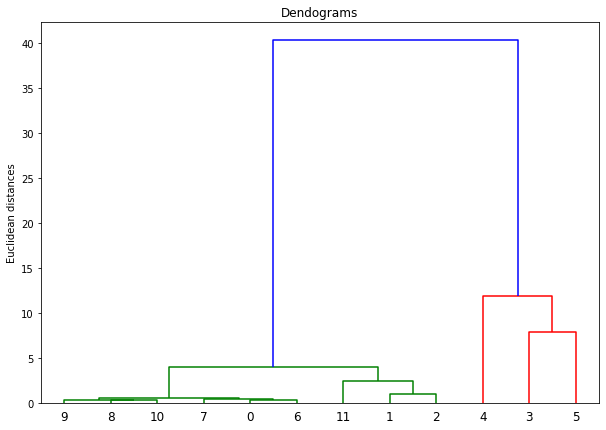

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_58_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_58_num)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
# Add the cluster to the dataframe
dataset_58['Cluster Labels'] = cluster.labels_

In [ ]:
dataset_58

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,disorder,Cluster Labels
1,-0.556,-0.560,-0.555,-0.563,-0.645,-0.571,-0.518,-0.614,-0.506,-0.637,...,-0.572,-0.528,-0.547,-0.563,-0.564,-0.611,-0.539,-0.527,Dementia,1
2,-0.500,-0.557,-0.519,-0.558,-0.274,-0.567,-0.476,-0.476,-0.372,-0.387,...,-0.571,-0.559,-0.372,-0.509,-0.559,-0.494,-0.537,-0.529,Alcoholic,1
3,-0.537,-0.549,-0.542,-0.563,-0.249,-0.550,-0.480,-0.458,-0.593,-0.484,...,-0.569,-0.549,-0.388,-0.525,-0.562,-0.596,-0.512,-0.524,Addicted to other drugs,1
4,2.527,0.963,2.111,2.391,2.562,2.302,0.936,1.884,2.849,1.402,...,1.354,2.529,1.396,1.654,1.023,1.857,1.491,1.994,Schizophrenia,0
5,0.606,2.000,1.003,1.371,1.175,1.265,0.800,1.322,0.521,1.320,...,1.734,0.678,-0.023,0.841,1.803,1.692,0.620,0.445,Depression,0
6,1.619,2.065,1.913,1.263,1.075,1.495,2.850,1.932,0.976,2.312,...,2.054,1.578,2.785,2.402,2.210,1.632,2.625,2.307,Anxiety Disorder,0
7,-0.574,-0.562,-0.600,-0.565,-0.657,-0.588,-0.531,-0.605,-0.561,-0.636,...,-0.574,-0.553,-0.527,-0.605,-0.562,-0.604,-0.541,-0.538,Intellectual Disabilities,1
8,-0.575,-0.565,-0.630,-0.568,-0.678,-0.584,-0.556,-0.606,-0.628,-0.599,...,-0.574,-0.594,-0.598,-0.605,-0.562,-0.559,-0.542,-0.538,Learning Disabilities,1
9,-0.600,-0.564,-0.611,-0.565,-0.684,-0.591,-0.542,-0.624,-0.594,-0.659,...,-0.574,-0.584,-0.604,-0.597,-0.560,-0.630,-0.542,-0.535,Autistic Disorder,1
10,-0.604,-0.565,-0.637,-0.568,-0.691,-0.596,-0.559,-0.629,-0.665,-0.674,...,-0.573,-0.598,-0.615,-0.630,-0.566,-0.636,-0.546,-0.538,ADHD,1


In [ ]:
hiera_summary_58 = dataset_58.iloc[: , [77,78]]

hiera_summary_58 = hiera_summary_58.sort_values(by='Cluster Labels')
hiera_summary_58

,disorder,Cluster Labels
4,Schizophrenia,0
5,Depression,0
6,Anxiety Disorder,0
1,Dementia,1
2,Alcoholic,1
3,Addicted to other drugs,1
7,Intellectual Disabilities,1
8,Learning Disabilities,1
9,Autistic Disorder,1
10,ADHD,1


#### Dataset 59

In [ ]:
dataset_59_num = dataset_59.iloc[:, 0:77]
dataset_59_num

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
1,-0.491,-0.568,-0.456,-0.487,-0.688,-0.585,-0.535,-0.610,-0.702,-0.598,...,-0.612,-0.642,-0.584,-0.531,-0.533,-0.567,-0.522,-0.606,-0.532,-0.538
2,-0.480,-0.562,-0.435,-0.435,-0.239,-0.510,-0.508,-0.502,-0.378,-0.376,...,-0.378,-0.407,-0.577,-0.448,-0.297,-0.474,-0.515,-0.413,-0.531,-0.512
3,-0.460,-0.552,-0.446,-0.440,-0.267,-0.523,-0.521,-0.412,0.304,-0.495,...,-0.395,-0.157,-0.553,0.201,-0.322,-0.396,-0.516,-0.468,-0.499,-0.509
4,2.982,2.274,3.069,3.056,2.185,2.220,1.922,1.714,2.226,1.051,...,2.045,2.695,1.779,3.124,0.691,1.339,2.798,2.609,2.386,1.983
5,0.304,1.381,0.300,0.612,1.472,1.318,0.575,1.392,0.774,1.434,...,1.060,0.941,1.555,0.013,0.031,0.902,0.816,1.142,0.367,0.441
6,0.983,1.430,0.754,0.550,1.352,1.557,2.318,2.032,1.457,2.459,...,1.931,1.013,1.852,0.458,3.065,2.566,1.046,1.097,1.930,2.317
7,-0.500,-0.569,-0.502,-0.488,-0.688,-0.607,-0.557,-0.610,-0.772,-0.609,...,-0.648,-0.677,-0.581,-0.433,-0.502,-0.635,-0.521,-0.587,-0.530,-0.545
8,-0.505,-0.569,-0.503,-0.493,-0.722,-0.600,-0.576,-0.578,-0.700,-0.594,...,-0.654,-0.495,-0.584,-0.557,-0.564,-0.652,-0.522,-0.499,-0.538,-0.545
9,-0.503,-0.571,-0.477,-0.493,-0.734,-0.606,-0.568,-0.642,-0.812,-0.625,...,-0.663,-0.707,-0.584,-0.585,-0.596,-0.598,-0.518,-0.629,-0.540,-0.544
10,-0.507,-0.571,-0.514,-0.496,-0.744,-0.611,-0.580,-0.658,-1.005,-0.629,...,-0.677,-0.728,-0.585,-0.618,-0.605,-0.672,-0.524,-0.637,-0.540,-0.551


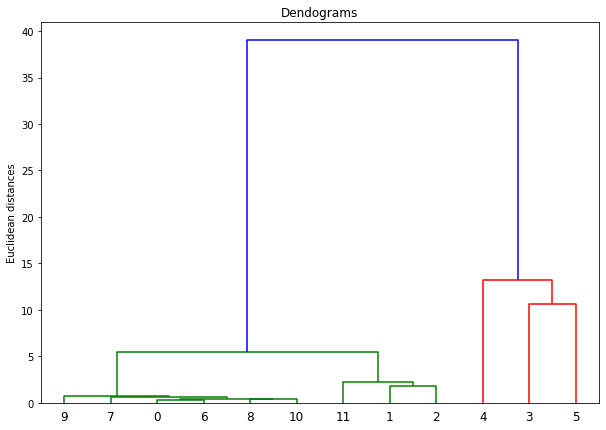

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_59_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_59_num)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
# Add the cluster to the dataframe
dataset_59['Cluster Labels'] = cluster.labels_

In [ ]:
dataset_59

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,disorder,Cluster Labels
1,-0.491,-0.568,-0.456,-0.487,-0.688,-0.585,-0.535,-0.610,-0.702,-0.598,...,-0.584,-0.531,-0.533,-0.567,-0.522,-0.606,-0.532,-0.538,Dementia,1
2,-0.480,-0.562,-0.435,-0.435,-0.239,-0.510,-0.508,-0.502,-0.378,-0.376,...,-0.577,-0.448,-0.297,-0.474,-0.515,-0.413,-0.531,-0.512,Alcoholic,1
3,-0.460,-0.552,-0.446,-0.440,-0.267,-0.523,-0.521,-0.412,0.304,-0.495,...,-0.553,0.201,-0.322,-0.396,-0.516,-0.468,-0.499,-0.509,Addicted to other drugs,1
4,2.982,2.274,3.069,3.056,2.185,2.220,1.922,1.714,2.226,1.051,...,1.779,3.124,0.691,1.339,2.798,2.609,2.386,1.983,Schizophrenia,0
5,0.304,1.381,0.300,0.612,1.472,1.318,0.575,1.392,0.774,1.434,...,1.555,0.013,0.031,0.902,0.816,1.142,0.367,0.441,Depression,0
6,0.983,1.430,0.754,0.550,1.352,1.557,2.318,2.032,1.457,2.459,...,1.852,0.458,3.065,2.566,1.046,1.097,1.930,2.317,Anxiety Disorder,0
7,-0.500,-0.569,-0.502,-0.488,-0.688,-0.607,-0.557,-0.610,-0.772,-0.609,...,-0.581,-0.433,-0.502,-0.635,-0.521,-0.587,-0.530,-0.545,Intellectual Disabilities,1
8,-0.505,-0.569,-0.503,-0.493,-0.722,-0.600,-0.576,-0.578,-0.700,-0.594,...,-0.584,-0.557,-0.564,-0.652,-0.522,-0.499,-0.538,-0.545,Learning Disabilities,1
9,-0.503,-0.571,-0.477,-0.493,-0.734,-0.606,-0.568,-0.642,-0.812,-0.625,...,-0.584,-0.585,-0.596,-0.598,-0.518,-0.629,-0.540,-0.544,Autistic Disorder,1
10,-0.507,-0.571,-0.514,-0.496,-0.744,-0.611,-0.580,-0.658,-1.005,-0.629,...,-0.585,-0.618,-0.605,-0.672,-0.524,-0.637,-0.540,-0.551,ADHD,1


In [ ]:
hiera_summary_59 = dataset_59.iloc[: , [77,78]]

hiera_summary_59 = hiera_summary_59.sort_values(by='Cluster Labels')
hiera_summary_59

,disorder,Cluster Labels
4,Schizophrenia,0
5,Depression,0
6,Anxiety Disorder,0
1,Dementia,1
2,Alcoholic,1
3,Addicted to other drugs,1
7,Intellectual Disabilities,1
8,Learning Disabilities,1
9,Autistic Disorder,1
10,ADHD,1


#### Dataset 60

In [ ]:
dataset_60_num = dataset_60.iloc[:, 0:77]
dataset_60_num

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
1,-0.760,-0.735,0.000,-0.749,-0.910,-0.738,-0.563,-0.831,-0.917,-0.708,...,-0.854,-0.861,-0.874,-0.943,-0.731,-0.701,-0.779,-0.886,-0.710,-0.789
2,1.680,0.542,0.000,1.680,1.095,0.649,2.554,1.405,0.730,2.082,...,0.817,0.380,0.733,1.753,0.564,0.346,1.569,0.634,1.466,0.166
3,0.021,-0.355,0.000,-0.073,1.309,-0.113,-0.373,0.431,0.073,1.419,...,0.610,0.606,-0.496,-0.198,0.027,-0.056,0.476,0.035,-0.758,0.168
4,2.006,1.240,0.000,2.166,1.843,2.136,0.403,1.839,2.204,0.255,...,2.144,1.594,1.798,1.520,1.043,1.622,1.090,1.667,1.475,2.089
5,0.121,1.992,0.000,0.563,0.708,1.230,0.176,0.702,0.399,0.431,...,0.681,1.422,1.145,0.223,-0.055,0.264,1.248,1.553,0.397,1.184
6,0.996,1.512,0.000,0.319,0.305,0.595,1.510,1.009,0.910,0.707,...,0.949,1.073,1.409,0.705,2.478,2.251,1.004,0.556,1.761,1.332
7,-0.860,-0.900,0.000,-0.865,-0.943,-0.982,-0.745,-0.939,-0.870,-0.845,...,-0.792,-0.481,-0.893,-0.868,-0.831,-0.854,-1.025,-0.865,-0.878,-0.886
8,-0.879,-0.734,0.000,-0.863,-1.038,-1.097,-0.737,-1.017,-1.090,-1.063,...,-1.051,-1.204,-0.929,-1.032,-0.858,-0.834,-1.038,-1.287,-0.843,-0.887
9,-0.859,-0.651,0.000,-0.833,-0.708,-0.253,-0.705,-0.903,-0.750,-0.715,...,-0.758,-0.890,-0.666,-0.896,-0.823,-0.809,-1.005,0.318,-0.773,-0.857
10,0.140,-0.229,0.000,0.240,0.209,0.580,-0.155,0.037,0.954,0.385,...,0.210,0.508,0.528,1.203,0.757,0.420,0.313,0.497,0.355,0.179


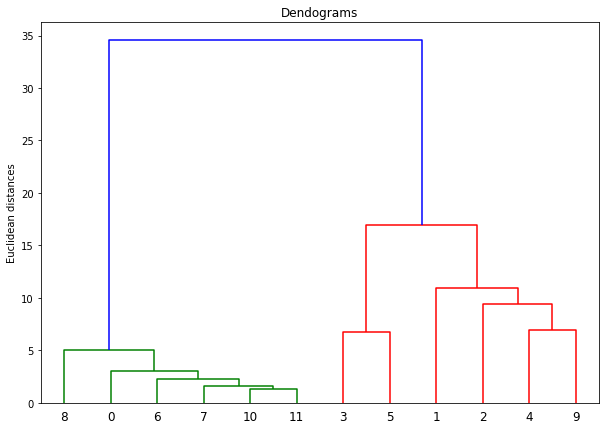

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_60_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_60_num)

array([1, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1])

In [ ]:
# Add the cluster to the dataframe
dataset_60['Cluster Labels'] = cluster.labels_

In [ ]:
dataset_60

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,disorder,Cluster Labels
1,-0.760,-0.735,0.000,-0.749,-0.910,-0.738,-0.563,-0.831,-0.917,-0.708,...,-0.874,-0.943,-0.731,-0.701,-0.779,-0.886,-0.710,-0.789,Dementia,1
2,1.680,0.542,0.000,1.680,1.095,0.649,2.554,1.405,0.730,2.082,...,0.733,1.753,0.564,0.346,1.569,0.634,1.466,0.166,Alcoholic,0
3,0.021,-0.355,0.000,-0.073,1.309,-0.113,-0.373,0.431,0.073,1.419,...,-0.496,-0.198,0.027,-0.056,0.476,0.035,-0.758,0.168,Addicted to other drugs,0
4,2.006,1.240,0.000,2.166,1.843,2.136,0.403,1.839,2.204,0.255,...,1.798,1.520,1.043,1.622,1.090,1.667,1.475,2.089,Schizophrenia,2
5,0.121,1.992,0.000,0.563,0.708,1.230,0.176,0.702,0.399,0.431,...,1.145,0.223,-0.055,0.264,1.248,1.553,0.397,1.184,Depression,0
6,0.996,1.512,0.000,0.319,0.305,0.595,1.510,1.009,0.910,0.707,...,1.409,0.705,2.478,2.251,1.004,0.556,1.761,1.332,Anxiety Disorder,2
7,-0.860,-0.900,0.000,-0.865,-0.943,-0.982,-0.745,-0.939,-0.870,-0.845,...,-0.893,-0.868,-0.831,-0.854,-1.025,-0.865,-0.878,-0.886,Intellectual Disabilities,1
8,-0.879,-0.734,0.000,-0.863,-1.038,-1.097,-0.737,-1.017,-1.090,-1.063,...,-0.929,-1.032,-0.858,-0.834,-1.038,-1.287,-0.843,-0.887,Learning Disabilities,1
9,-0.859,-0.651,0.000,-0.833,-0.708,-0.253,-0.705,-0.903,-0.750,-0.715,...,-0.666,-0.896,-0.823,-0.809,-1.005,0.318,-0.773,-0.857,Autistic Disorder,1
10,0.140,-0.229,0.000,0.240,0.209,0.580,-0.155,0.037,0.954,0.385,...,0.528,1.203,0.757,0.420,0.313,0.497,0.355,0.179,ADHD,0


In [ ]:
hiera_summary_60 = dataset_60.iloc[: , [77,78]]

hiera_summary_60 = hiera_summary_60.sort_values(by='Cluster Labels')
hiera_summary_60

,disorder,Cluster Labels
2,Alcoholic,0
3,Addicted to other drugs,0
5,Depression,0
10,ADHD,0
1,Dementia,1
7,Intellectual Disabilities,1
8,Learning Disabilities,1
9,Autistic Disorder,1
11,Self-Harm,1
12,Epilepsy,1


#### Dataset 61

In [ ]:
dataset_61_num = dataset_61.iloc[:, 0:77]
dataset_61_num

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
1,-0.769,-0.775,-0.777,-0.807,-0.884,-0.889,-0.634,-0.688,-1.007,-0.841,...,-0.841,-0.976,-0.913,-1.000,-0.831,-0.806,-0.748,-0.975,-0.774,-0.834
2,2.332,1.402,0.959,1.922,1.989,1.582,2.159,2.848,1.289,2.030,...,2.263,0.823,1.533,1.640,0.752,1.022,1.226,1.247,2.029,1.891
3,0.185,-0.480,-0.057,0.155,1.229,0.819,-0.200,0.208,0.164,0.832,...,0.434,0.411,-0.534,0.276,0.068,0.408,0.381,-0.076,-0.685,-0.070
4,1.033,0.588,1.426,1.743,1.055,0.705,0.341,0.583,1.383,0.291,...,1.141,1.011,1.204,1.157,0.787,1.101,0.759,1.003,1.034,1.034
5,0.177,1.876,1.015,0.515,0.583,1.788,0.539,0.185,0.512,0.887,...,0.319,1.594,1.086,0.751,1.310,0.144,1.276,1.539,0.559,1.574
6,1.102,1.433,1.669,0.545,0.374,0.449,1.829,0.598,1.473,1.058,...,0.923,1.245,1.467,1.134,2.081,2.232,1.585,0.923,1.567,0.681
7,-0.864,-0.909,-1.016,-0.943,-0.946,-0.942,-0.837,-0.732,-0.913,-0.871,...,-0.876,-0.742,-0.925,-0.964,-0.923,-0.918,-1.061,-0.767,-0.837,-0.883
8,-0.921,-0.775,-1.037,-0.911,-1.028,-1.007,-0.839,-0.789,-1.195,-1.106,...,-0.961,-1.160,-0.926,-1.132,-0.945,-0.908,-1.082,-1.231,-0.824,-0.903
9,-0.764,-0.614,-0.503,-0.829,-0.672,-0.605,-0.716,-0.661,-0.612,-0.522,...,-0.679,-0.667,-0.643,-0.849,-0.874,-0.810,-0.934,0.414,-0.644,-0.776
10,0.170,-0.028,0.378,0.343,0.161,0.034,-0.078,-0.118,0.762,0.309,...,0.050,0.629,0.375,0.749,0.290,0.279,0.445,0.311,0.104,0.025


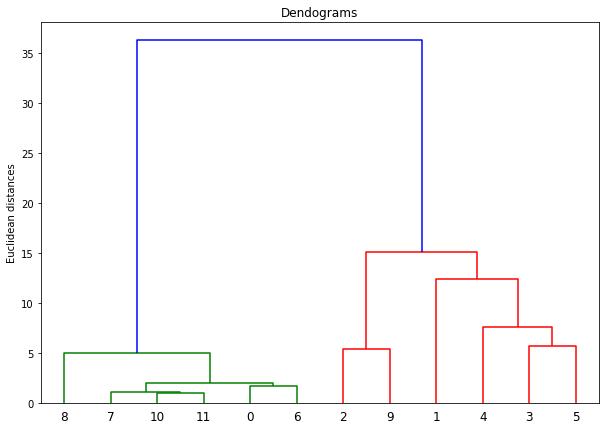

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_61_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_61_num)

array([1, 3, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1])

In [ ]:
# Add the cluster to the dataframe
dataset_61['Cluster Labels'] = cluster.labels_

In [ ]:
hiera_summary_61 = dataset_61.iloc[: , [77,78]]

hiera_summary_61 = hiera_summary_61.sort_values(by='Cluster Labels')
hiera_summary_61

,disorder,Cluster Labels
4,Schizophrenia,0
5,Depression,0
6,Anxiety Disorder,0
1,Dementia,1
7,Intellectual Disabilities,1
8,Learning Disabilities,1
9,Autistic Disorder,1
11,Self-Harm,1
12,Epilepsy,1
3,Addicted to other drugs,2


#### Dataset 62

In [ ]:
dataset_62_num = dataset_62.iloc[:, 0:77]
dataset_62_num

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
1,-0.860,-0.621,-0.375,-0.869,-0.782,-0.733,-0.597,-0.878,-0.986,-1.002,...,-0.779,-1.076,-0.820,-0.827,-0.841,-0.767,-0.776,-0.996,-0.807,-0.974
2,0.435,-0.356,-0.650,0.252,1.182,2.740,-0.122,0.690,0.054,0.588,...,1.127,0.547,-0.460,0.791,0.776,0.324,0.745,0.187,-0.748,0.877
3,-0.510,0.044,-0.582,0.049,-0.690,0.204,-0.571,-0.475,0.107,0.249,...,-0.898,-0.292,0.091,-0.862,-0.386,-0.146,0.457,0.217,1.588,-0.176
4,1.284,0.703,0.854,1.942,1.348,0.365,0.493,1.056,1.141,0.270,...,1.502,1.009,0.944,0.852,0.819,1.685,0.279,0.757,1.156,1.694
5,1.593,2.508,2.051,1.567,1.642,0.601,1.727,1.560,1.070,1.920,...,1.032,1.736,1.729,1.929,1.558,1.303,1.901,2.470,1.629,1.419
6,1.791,1.336,1.757,0.739,0.843,0.421,2.372,1.793,1.727,1.576,...,1.523,1.469,1.930,0.956,1.909,1.409,1.547,0.672,1.090,1.137
7,-0.834,-0.865,-0.880,-0.974,-1.005,-0.898,-0.726,-0.909,-1.028,-1.129,...,-0.922,-1.068,-0.920,-0.932,-0.803,-0.950,-0.916,-1.049,-0.683,-0.896
8,-0.819,-0.891,-0.898,-1.038,-0.879,-0.888,-0.721,-0.811,-0.891,-0.693,...,-0.824,-0.646,-0.883,-0.415,-0.908,-0.965,-1.041,-0.484,-0.814,-1.005
9,-0.910,-0.583,-0.609,-0.861,-1.024,-0.837,-0.741,-0.960,-1.184,-0.996,...,-0.972,-1.044,-0.854,-1.021,-0.900,-0.908,-1.029,-1.056,-0.839,-0.955
10,-0.542,-0.425,0.007,-0.657,-0.346,-0.252,-0.584,-0.565,-0.379,0.097,...,-0.434,-0.419,-0.535,-0.539,-0.686,-0.787,-0.772,-0.220,-0.733,-0.479


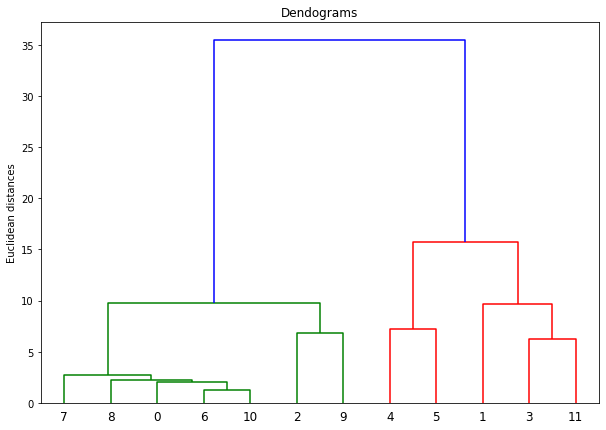

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_62_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_62_num)

array([0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1])

In [ ]:
# Add the cluster to the dataframe
dataset_62['Cluster Labels'] = cluster.labels_

In [ ]:
hiera_summary_62 = dataset_62.iloc[: , [77,78]]

hiera_summary_62 = hiera_summary_62.sort_values(by='Cluster Labels')
hiera_summary_62

,disorder,Cluster Labels
1,Dementia,0
3,Addicted to other drugs,0
7,Intellectual Disabilities,0
8,Learning Disabilities,0
9,Autistic Disorder,0
10,ADHD,0
11,Self-Harm,0
2,Alcoholic,1
4,Schizophrenia,1
12,Epilepsy,1


#### Dataset 63

In [ ]:
dataset_63_num = dataset_63.iloc[:, 0:77]
dataset_63_num

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
1,-0.721,-0.472,-0.382,-0.634,-0.802,-0.681,-0.540,-0.562,-0.802,-0.851,...,-0.826,-1.015,-0.437,-0.828,-0.889,-0.593,-0.687,-0.904,-0.488,-0.836
2,-0.011,-0.299,-0.592,-0.076,0.319,0.790,-0.457,0.740,-0.464,-0.034,...,0.671,0.614,-0.437,0.373,0.432,-0.246,1.248,-0.200,-0.504,-0.094
3,-0.560,-0.519,-0.559,0.002,1.777,0.604,1.656,2.969,0.463,0.033,...,1.820,0.456,-0.130,0.039,0.203,-0.509,1.244,0.260,-0.238,0.580
4,1.698,0.303,-0.076,1.034,1.104,0.117,0.119,-0.097,0.996,0.054,...,0.583,0.875,0.001,0.786,0.936,0.798,-0.074,0.881,0.046,1.611
5,2.068,3.130,3.222,2.932,1.740,2.810,2.202,0.544,2.150,2.977,...,1.867,1.696,3.271,2.511,1.249,1.357,2.181,2.425,3.063,2.011
6,1.103,0.442,0.155,-0.148,0.174,-0.035,1.033,-0.154,1.087,0.555,...,0.367,1.247,-0.033,0.486,2.152,2.517,0.377,0.624,0.877,1.000
7,-0.701,-0.277,-0.345,-0.640,-0.904,-0.771,-0.735,-0.588,-0.967,-0.789,...,-0.879,-1.164,-0.447,-0.881,-0.814,-0.674,-0.827,-0.991,-0.496,-0.797
8,-0.878,-0.688,-0.546,-0.698,-0.942,-0.754,-0.782,-0.632,-0.971,-0.433,...,-0.888,-0.734,-0.449,-0.619,-1.020,-0.787,-0.917,-0.883,-0.513,-0.932
9,-0.825,-0.407,-0.325,-0.651,-0.941,-0.808,-0.774,-0.627,-1.091,-0.674,...,-0.912,-1.167,-0.450,-1.087,-0.943,-0.713,-0.911,-0.959,-0.510,-0.828
10,-0.398,-0.351,0.047,-0.621,-0.789,-0.612,-0.725,-0.569,-0.525,0.158,...,-0.758,-0.505,-0.420,-0.494,-0.466,-0.616,-0.830,0.549,-0.506,-0.462


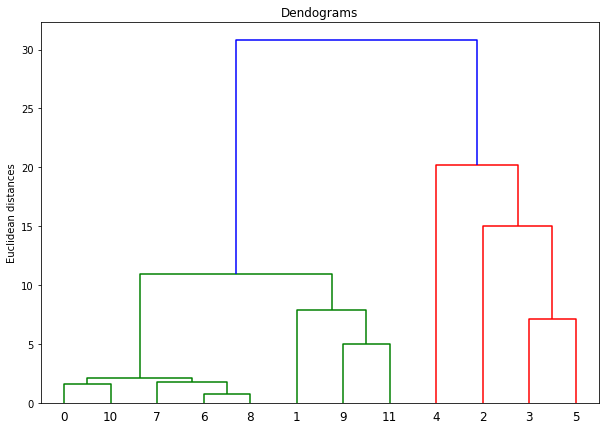

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_63_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_63_num)

array([1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
# Add the cluster to the dataframe
dataset_63['Cluster Labels'] = cluster.labels_

In [ ]:
hiera_summary_63 = dataset_63.iloc[: , [77,78]]

hiera_summary_63 = hiera_summary_63.sort_values(by='Cluster Labels')
hiera_summary_63

,disorder,Cluster Labels
3,Addicted to other drugs,0
4,Schizophrenia,0
6,Anxiety Disorder,0
1,Dementia,1
2,Alcoholic,1
7,Intellectual Disabilities,1
8,Learning Disabilities,1
9,Autistic Disorder,1
10,ADHD,1
11,Self-Harm,1


#### Dataset 64

In [ ]:
dataset_64_num = dataset_64.iloc[:, 0:77]
dataset_64_num

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
1,-0.746,-0.399,-0.437,-0.763,-0.798,-0.631,-0.296,-0.714,-0.784,-0.829,...,-0.835,-0.746,-0.674,-0.845,-0.928,-0.723,-0.416,-0.704,-0.697,-0.814
2,0.472,-0.401,-0.679,0.419,0.953,0.169,-0.322,0.621,-0.097,0.373,...,1.144,0.215,-0.330,0.287,0.460,0.311,0.783,0.050,-0.725,0.195
3,-0.913,-0.500,-0.721,-0.571,-0.007,-0.809,-0.597,-0.172,-0.289,-0.442,...,-0.595,-0.730,-0.824,0.015,0.505,-0.164,-0.868,-0.666,-0.719,-0.794
4,1.422,0.710,1.729,2.173,1.527,1.119,0.411,1.183,1.078,0.280,...,1.502,1.075,0.945,0.792,0.979,1.817,0.543,0.786,1.518,1.811
5,1.706,2.920,1.772,1.502,1.647,2.209,2.021,1.893,1.622,2.426,...,1.387,2.117,1.988,2.293,1.440,1.477,1.963,2.717,1.647,1.648
6,1.461,0.657,1.502,0.540,0.588,0.826,2.165,1.302,1.580,1.365,...,1.150,1.177,1.736,0.925,1.701,1.059,1.550,0.496,1.720,1.039
7,-0.818,-0.580,-0.648,-0.848,-0.916,-0.879,-0.681,-0.951,-0.931,-0.898,...,-0.925,-0.995,-0.762,-0.981,-0.908,-0.808,-0.632,-0.759,-0.670,-0.692
8,-0.929,-0.767,-0.886,-0.979,-1.064,-0.968,-0.788,-0.996,-0.891,-0.669,...,-0.974,-0.675,-0.833,-0.537,-1.117,-1.018,-1.013,-0.662,-0.698,-0.983
9,-0.943,-0.531,-0.543,-0.848,-1.133,-0.934,-0.764,-1.006,-1.135,-0.832,...,-0.991,-0.909,-0.769,-1.103,-1.036,-0.919,-0.955,-0.892,-0.693,-0.941
10,-0.161,-0.351,-0.125,-0.569,-0.425,-0.028,-0.591,-0.609,-0.334,0.064,...,-0.387,-0.321,-0.410,-0.595,-0.378,-0.823,-0.729,0.025,-0.406,-0.027


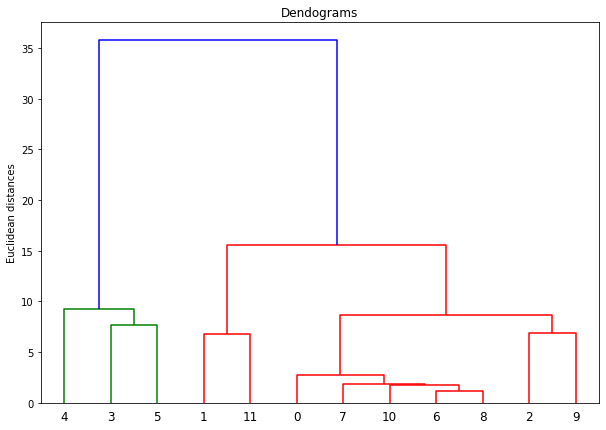

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_64_num, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_64_num)

array([1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2])

In [ ]:
# Add the cluster to the dataframe
dataset_64['Cluster Labels'] = cluster.labels_

In [ ]:
hiera_summary_64 = dataset_64.iloc[: , [77,78]]

hiera_summary_64 = hiera_summary_64.sort_values(by='Cluster Labels')
hiera_summary_64

,disorder,Cluster Labels
4,Schizophrenia,0
5,Depression,0
6,Anxiety Disorder,0
1,Dementia,1
3,Addicted to other drugs,1
7,Intellectual Disabilities,1
8,Learning Disabilities,1
9,Autistic Disorder,1
10,ADHD,1
11,Self-Harm,1


### All year dataset

In [ ]:
dataset_all_num = dataset_all.iloc[:, 0:539]
dataset_all_num.drop(index = 10, inplace=True)
dataset_all_num.index = ['Dementia','Alcoholic','Addicted to other drugs','Schizophrenia','Depression','Anxiety Disorder','Intellectual Disabilities','Learning Disabilities','Autistic Disorder','Self-Harm','Epilepsy']
dataset_all_num

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,0,1,2,3,4,5,6,7,8,9,...,529,530,531,532,533,534,535,536,537,538
Dementia,-0.556333,-0.559654,-0.555187,-0.562581,-0.644531,-0.570839,-0.517780,-0.614473,-0.505951,-0.637137,...,-0.834599,-0.746333,-0.674347,-0.844933,-0.928398,-0.722754,-0.415688,-0.704189,-0.696691,-0.814259
Alcoholic,-0.500089,-0.556880,-0.518699,-0.558473,-0.274159,-0.566921,-0.476162,-0.475806,-0.372199,-0.386981,...,1.143534,0.214747,-0.330146,0.287194,0.459857,0.310549,0.782996,0.050186,-0.724657,0.194746
Addicted to other drugs,-0.537250,-0.548557,-0.542309,-0.562581,-0.248633,-0.550464,-0.480467,-0.458001,-0.592997,-0.483731,...,-0.594870,-0.730491,-0.824075,0.015262,0.504561,-0.164020,-0.868482,-0.666153,-0.719330,-0.794103
Schizophrenia,2.527059,0.962556,2.110568,2.391140,2.562170,2.302100,0.935999,1.883935,2.849011,1.401584,...,1.501902,1.075494,0.945119,0.792211,0.979072,1.817407,0.542507,0.785543,1.517895,1.810815
Depression,0.605714,2.000174,1.003056,1.370963,1.175422,1.264519,0.799662,1.322418,0.521078,1.320306,...,1.386695,2.117103,1.988048,2.293389,1.439580,1.476691,1.962891,2.716911,1.647068,1.648378
Anxiety Disorder,1.619115,2.064910,1.913104,1.262783,1.074546,1.494918,2.849735,1.931527,0.975943,2.311556,...,1.150397,1.177146,1.735921,0.925403,1.701342,1.059415,1.549552,0.496049,1.720310,1.038944
Intellectual Disabilities,-0.574411,-0.562429,-0.600260,-0.565320,-0.656558,-0.588080,-0.530696,-0.605228,-0.561151,-0.636483,...,-0.924804,-0.994524,-0.762119,-0.980899,-0.908470,-0.808441,-0.631751,-0.759129,-0.670058,-0.692135
Learning Disabilities,-0.575416,-0.565203,-0.630309,-0.568058,-0.678157,-0.584162,-0.555811,-0.605571,-0.628027,-0.599003,...,-0.974318,-0.675044,-0.832680,-0.536928,-1.117449,-1.018346,-1.013150,-0.661927,-0.698023,-0.982624
Autistic Disorder,-0.599520,-0.564278,-0.610991,-0.565320,-0.683556,-0.591215,-0.542177,-0.624402,-0.593527,-0.658927,...,-0.991477,-0.908713,-0.769003,-1.102991,-1.036119,-0.918971,-0.954907,-0.892254,-0.692696,-0.941126
Self-Harm,-0.587468,-0.557805,-0.602406,-0.565320,-0.658767,-0.579460,-0.546483,-0.616527,-0.612104,-0.634740,...,-0.975789,-0.953599,-0.689836,-1.022521,-1.132530,-0.974236,-0.825269,-0.875349,-0.800562,-0.983810


In [ ]:
disorder = dataset_all_num.index
legend_df = pd.DataFrame({"index" : range(0,11), "disorder" : disorder})
legend_df.to_csv("legend.csv")
legend_df

,index,disorder
0,0,Dementia
1,1,Alcoholic
2,2,Addicted to other drugs
3,3,Schizophrenia
4,4,Depression
5,5,Anxiety Disorder
6,6,Intellectual Disabilities
7,7,Learning Disabilities
8,8,Autistic Disorder
9,9,Self-Harm


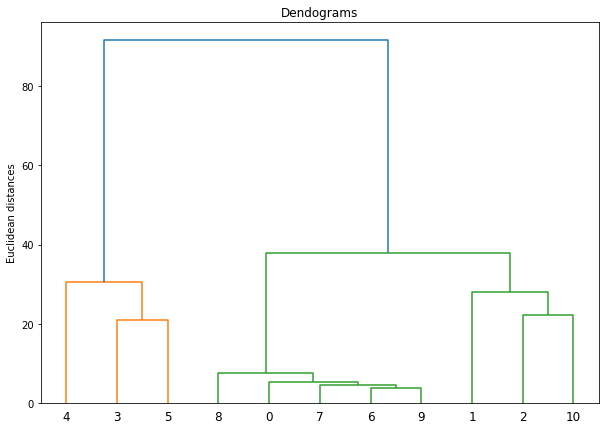

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_all_num, method='ward'))

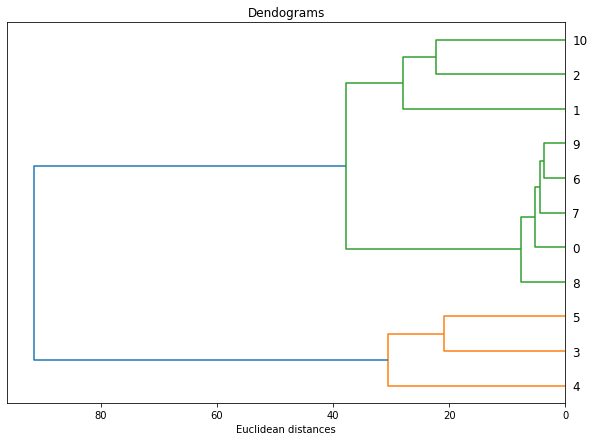

In [ ]:
## อันนี้แบบเอียงเด้อ จะได้ใส้ชื่อง่ายขึ้น

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
plt.xlabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(dataset_all_num, method='ward'), orientation='left')


In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_all_num)

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
# Add the cluster to the dataframe
hiera_summary_all = dataset_all.copy()
hiera_summary_all.drop(index=10, inplace=True)
hiera_summary_all['Cluster Labels'] = cluster.labels_

In [ ]:
hiera_summary_all = hiera_summary_all.iloc[: , [539,540]]

hiera_summary_all = hiera_summary_all.sort_values(by='Cluster Labels')
hiera_summary_all.to_csv("hiera_2_cluster.csv")
hiera_summary_all

,disorder,Cluster Labels
1,Dementia,0
2,Alcoholic,0
3,Addicted to other drugs,0
7,Intellectual Disabilities,0
8,Learning Disabilities,0
9,Autistic Disorder,0
11,Self-Harm,0
12,Epilepsy,0
4,Schizophrenia,1
5,Depression,1


In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataset_all_num)

array([2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1])

In [ ]:
# Add the cluster to the dataframe
hiera_summary_all2 = dataset_all.copy()
hiera_summary_all2.drop(index=10, inplace=True)
hiera_summary_all2['Cluster Labels'] = cluster.labels_

In [ ]:
hiera_summary_all2 = hiera_summary_all2.iloc[: , [539,540]]

hiera_summary_all2 = hiera_summary_all2.sort_values(by='Cluster Labels')
hiera_summary_all2.to_csv("hiera_3_cluster.csv")
hiera_summary_all2

,disorder,Cluster Labels
4,Schizophrenia,0
5,Depression,0
6,Anxiety Disorder,0
2,Alcoholic,1
3,Addicted to other drugs,1
12,Epilepsy,1
1,Dementia,2
7,Intellectual Disabilities,2
8,Learning Disabilities,2
9,Autistic Disorder,2




---



## ข้างล่างนี้คือไม่ใช้แร้ว

## K-mean clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
scikit_pca = PCA(n_components=6)
X_pca = scikit_pca.fit_transform(dataset)
dataset_pca = pd.DataFrame(X_pca)
dataset_pca

,0,1,2,3,4,5
0,-15.768,-3.134,-1.120,-0.498,-0.436,-0.094
1,2.753,19.560,2.485,-3.023,-2.911,4.213
2,-5.174,6.857,3.725,9.611,8.215,-1.200
3,31.142,-0.888,-11.248,6.955,-6.570,0.137
4,29.662,-5.146,16.128,-0.004,-2.712,-3.553
5,35.934,-2.749,-7.069,-6.218,8.001,0.883
6,-17.245,-3.305,-2.003,-0.177,-0.431,-0.460
7,-17.763,-4.020,-1.530,-0.450,-0.509,0.141
8,-16.045,-1.309,-2.677,-1.415,-0.729,-2.856
9,-5.525,5.266,-0.531,-4.717,-1.287,-5.689


In [ ]:
from sklearn.metrics import silhouette_score
for k in range(2,10):
    labels = KMeans(n_clusters=k).fit(dataset_pca).predict(dataset_pca)
    print("K = {}, Silhouette score = {:1.4f}".format(k,silhouette_score(dataset_pca, labels)))

K = 2, Silhouette score = 0.5900
K = 3, Silhouette score = 0.4399
K = 4, Silhouette score = 0.3811
K = 5, Silhouette score = 0.3331
K = 6, Silhouette score = 0.3526
K = 7, Silhouette score = 0.3525
K = 8, Silhouette score = 0.3426
K = 9, Silhouette score = 0.1934


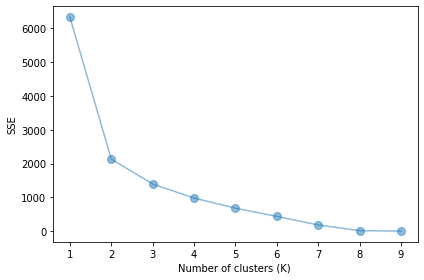

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(dataset_pca)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o', alpha=0.5, ms=8)
plt.xlabel("Number of clusters (K) ")
plt.ylabel("SSE")
plt.tight_layout();
plt.savefig('elbow_output.png', dpi=300, format='png', bbox_inches='tight')

In [ ]:
# Number of clusters
K = 2
# Fit the input data
kmeans = KMeans(n_clusters=K).fit(dataset_pca)

In [ ]:
# Add the cluster to the dataframe
kmean_result = dataset_pca.copy()
kmean_result['disorder'] = disorder
kmean_result['Cluster Labels'] = kmeans.labels_

kmean_result = kmean_result.iloc[: , [6,7]]
kmean_result = kmean_result.sort_values(by='Cluster Labels')

kmean_result

,disorder,Cluster Labels
0,Dementia,0
1,Alcoholic,0
2,Addicted to other drugs,0
6,Intellectual Disabilities,0
7,Learning Disabilities,0
8,Autistic Disorder,0
9,ADHD,0
10,Self-Harm,0
11,Epilepsy,0
3,Schizophrenia,1


In [ ]:
# Number of clusters
K = 3
# Fit the input data
kmeans = KMeans(n_clusters=K).fit(dataset_pca)

# Add the cluster to the dataframe
kmean_result = dataset_pca.copy()
kmean_result['disorder'] = disorder
kmean_result['Cluster Labels'] = kmeans.labels_

kmean_result = kmean_result.loc[: , ["disorder","Cluster Labels"]]
kmean_result = kmean_result.sort_values(by='Cluster Labels')

kmean_result

,disorder,Cluster Labels
1,Alcoholic,0
2,Addicted to other drugs,0
9,ADHD,0
3,Schizophrenia,1
4,Depression,1
5,Anxiety Disorder,1
0,Dementia,2
6,Intellectual Disabilities,2
7,Learning Disabilities,2
8,Autistic Disorder,2


### Dataset for K-prototype clustering

In [ ]:
def split(df):
    
    data = df.drop(columns=['Addicted to Amphetamine','Other Mental Illnesses','Bipolar Disorder',
               'Game Addiction(Older than 15 years old)','Game Addiction(Younger than 15 years old)',
               'Other Psychosis','Male_population', 'Women_population', 'Total_population'])
    
    df_split = []
    
    for i in range(1, 13) :
        disorder = data.iloc[:,[0, i]]
        disorder['disorder'] = data.columns[i]
        disorder.columns = ['province', 'frequency', 'disorder']
        df_split.append(disorder)
    
    return df_split

In [ ]:
list_58 = split(df_58)
list_59 = split(df_59)
list_60 = split(df_60)
list_61 = split(df_61)
list_62 = split(df_62)
list_63 = split(df_63)
list_64 = split(df_64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
def append_loop(list_of_df) :
  for i in range(11) :
    if i == 0 :
      df1 = list_of_df[i]
      df2 = list_of_df[i + 1]
      df_append = df1.append(df2)
    else :
      df2 = list_of_df[i + 1]
      df_append = df_append.append(df2)
  return df_append

In [ ]:
y_58 = append_loop(list_58)
y_59 = append_loop(list_59)
y_60 = append_loop(list_60)
y_61 = append_loop(list_61)
y_62 = append_loop(list_62)
y_63 = append_loop(list_63)
y_64 = append_loop(list_64)

In [ ]:
dataset = [y_58, y_59, y_60, y_61, y_62, y_63, y_64]
for i in range(6) :
  if i == 0 :
    df1 = dataset[i]
    df2 = dataset[i + 1]
    final_dataset = df1.append(df2)
  else :
    df2 = dataset[i + 1]
    final_dataset = final_dataset.append(df2)

final_dataset

,province,frequency,disorder
0,Amnat Charoen,12.773,Dementia
1,Ang Thong,2.119,Dementia
2,Bangkok Metropolis,0.703,Dementia
3,Bueng Kan,1.430,Dementia
4,Buri Ram,12.205,Dementia
...,...,...,...
72,Udon Thani,234.436,Epilepsy
73,Uthai Thani,272.639,Epilepsy
74,Uttaradit,162.509,Epilepsy
75,Yala,198.929,Epilepsy


In [ ]:
from numpy import array
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(final_dataset[['province']]).toarray())
final_df = final_dataset.join(encoder_df)
final_df.drop('province', axis=1, inplace=True)
final_df.columns = [ 'frequency', 'disorder', 'province_00', 'province_01', 'province_02', 'province_03'
                    , 'province_04', 'province_05', 'province_06', 'province_07', 'province_08', 'province_09', 'province_10'
                    , 'province_11', 'province_12', 'province_13', 'province_14', 'province_15', 'province_16', 'province_17'
                    , 'province_18', 'province_19', 'province_20', 'province_21', 'province_22', 'province_23', 'province_24'
                    , 'province_25', 'province_26', 'province_27', 'province_28', 'province_29', 'province_30', 'province_31'
                    , 'province_32', 'province_33', 'province_34', 'province_35', 'province_36', 'province_37', 'province_38'
                    , 'province_39', 'province_40', 'province_41', 'province_42', 'province_43', 'province_44', 'province_45'
                    , 'province_46', 'province_47', 'province_48', 'province_49', 'province_50', 'province_51', 'province_52'
                    , 'province_53', 'province_54', 'province_55', 'province_56', 'province_57', 'province_58', 'province_59'
                    , 'province_60', 'province_61', 'province_62', 'province_63', 'province_64', 'province_65', 'province_66'
                    , 'province_67', 'province_68', 'province_69', 'province_70', 'province_71', 'province_72', 'province_73'
                    , 'province_74', 'province_75', 'province_76']
final_df

,frequency,disorder,province_00,province_01,province_02,province_03,province_04,province_05,province_06,province_07,...,province_67,province_68,province_69,province_70,province_71,province_72,province_73,province_74,province_75,province_76
0,12.773,Dementia,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0,27.675,Alcoholic,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0,17.829,Addicted to other drugs,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0,829.708,Schizophrenia,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
0,320.654,Depression,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,12.180,Learning Disabilities,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
76,18.738,Autistic Disorder,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
76,163.205,ADHD,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
76,11.992,Self-Harm,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000


In [ ]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
df_list = [df_58, df_59, df_60, df_61, df_62, df_63, df_64]
df_list_tp = []

for df in df_list :
  df = df.drop(columns=['NAME_1','ADHD','Addicted to Amphetamine','Other Mental Illnesses','Bipolar Disorder',
              'Game Addiction(Older than 15 years old)','Game Addiction(Younger than 15 years old)',
              'Other Psychosis','Male_population', 'Women_population', 'Total_population'])
  
  disorder = df.columns
  df = df.transpose()

  #df = df.apply(lambda x : (x - df.mean())/df.std(), axis=1)
  #df = df.fillna(0)
  df = pd.DataFrame(std_scaler.fit_transform(df), columns = df.columns)

  df['disorder'] = disorder
  df.index = range(1, 12)

  df_list_tp.append(df)

dataset_58 = df_list_tp[0]
dataset_59 = df_list_tp[1]
dataset_60 = df_list_tp[2]
dataset_61 = df_list_tp[3]
dataset_62 = df_list_tp[4]
dataset_63 = df_list_tp[5]
dataset_64 = df_list_tp[6]

### Data 2015-2021

#### Dataset 58

In [ ]:
dfMatrix = dataset_58.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})

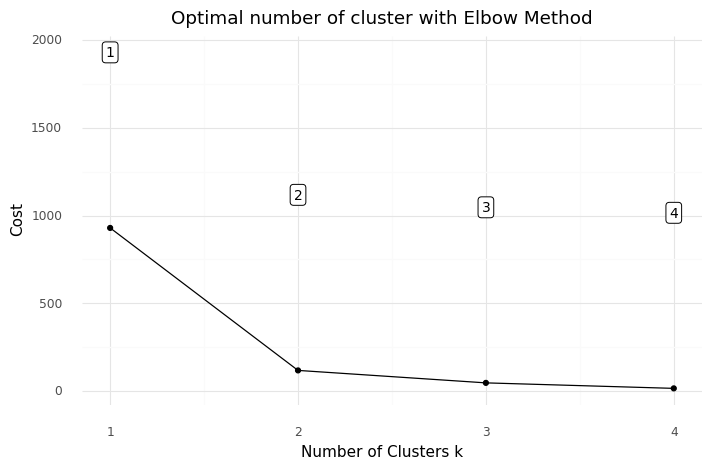

<ggplot: (8770086821833)>

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=uint16)

In [ ]:
# Add the cluster to the dataframe
data = dataset_58.copy()
data['Cluster Labels'] = kprototype.labels_

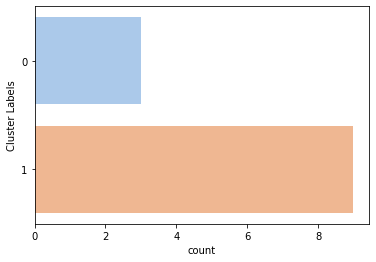

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = data, y = 'Cluster Labels' ,palette="pastel")

In [ ]:
summary_58 = data.iloc[: , [77,78]]

summary_58 = summary_58.sort_values(by='Cluster Labels')
summary_58

,disorder,Cluster Labels
4,Schizophrenia,0
5,Depression,0
6,Anxiety Disorder,0
1,Dementia,1
2,Alcoholic,1
3,Addicted to other drugs,1
7,Intellectual Disabilities,1
8,Learning Disabilities,1
9,Autistic Disorder,1
10,ADHD,1


#### Dataset 59

In [ ]:
dfMatrix = dataset_59.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})

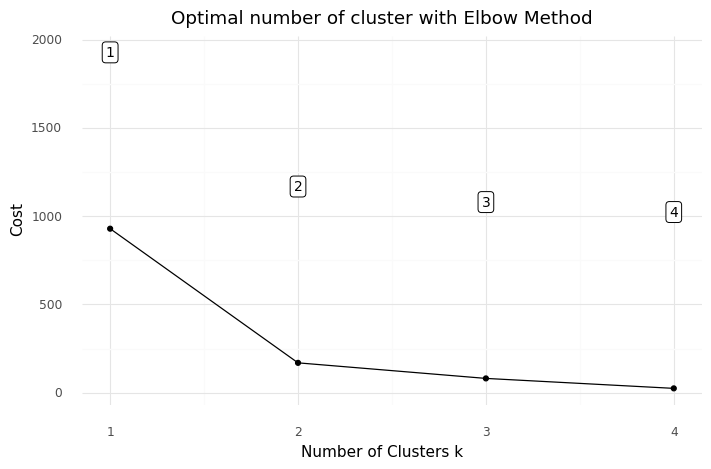

<ggplot: (8787110813885)>

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=uint16)

In [ ]:
# Add the cluster to the dataframe
dataset_59['Cluster Labels'] = kprototype.labels_

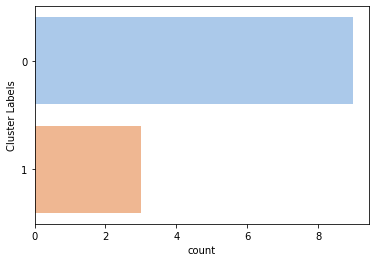

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = dataset_59, y = 'Cluster Labels' ,palette="pastel")

In [ ]:
summary_59 = dataset_59.iloc[: , [77,78]]

summary_59 = summary_59.sort_values(by='Cluster Labels')
summary_59

,disorder,Cluster Labels
1,Dementia,0
2,Alcoholic,0
3,Addicted to other drugs,0
7,Intellectual Disabilities,0
8,Learning Disabilities,0
9,Autistic Disorder,0
10,ADHD,0
11,Self-Harm,0
12,Epilepsy,0
4,Schizophrenia,1


#### Dataset 60

In [ ]:
dfMatrix = dataset_60.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})

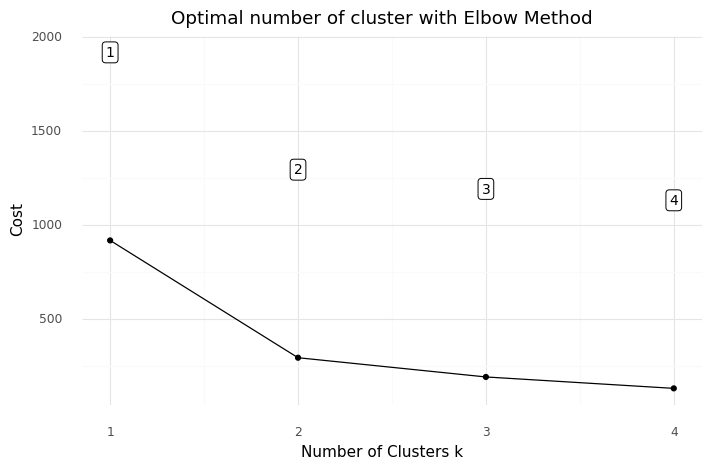

<ggplot: (8787110250177)>

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

array([1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 1], dtype=uint16)

In [ ]:
# Add the cluster to the dataframe
dataset_60['Cluster Labels'] = kprototype.labels_

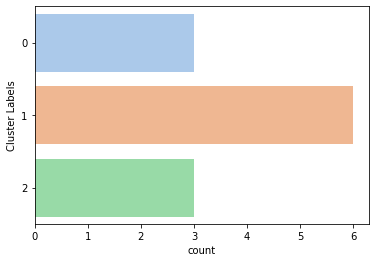

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = dataset_60, y = 'Cluster Labels' ,palette="pastel")

In [ ]:
summary_60 = dataset_60.iloc[: , [77,78]]

summary_60 = summary_60.sort_values(by='Cluster Labels')
summary_60

,disorder,Cluster Labels
2,Alcoholic,0
3,Addicted to other drugs,0
10,ADHD,0
1,Dementia,1
7,Intellectual Disabilities,1
8,Learning Disabilities,1
9,Autistic Disorder,1
11,Self-Harm,1
12,Epilepsy,1
4,Schizophrenia,2


#### Dataset 61

In [ ]:
dfMatrix = dataset_61.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})

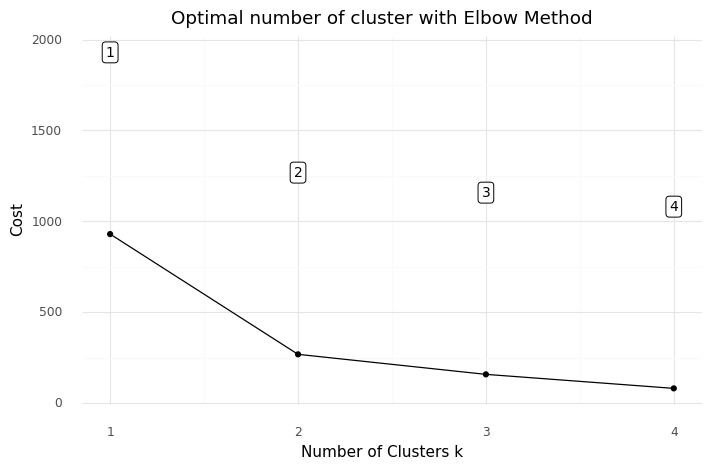

<ggplot: (8787110256577)>

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2], dtype=uint16)

In [ ]:
# Add the cluster to the dataframe
dataset_61['Cluster Labels'] = kprototype.labels_

In [ ]:
summary_61 = dataset_61.iloc[: , [77,78]]

summary_61 = summary_61.sort_values(by='Cluster Labels')
summary_61

,disorder,Cluster Labels
2,Alcoholic,0
4,Schizophrenia,0
5,Depression,0
6,Anxiety Disorder,0
3,Addicted to other drugs,1
10,ADHD,1
1,Dementia,2
7,Intellectual Disabilities,2
8,Learning Disabilities,2
9,Autistic Disorder,2


#### Dataset 62

In [ ]:
dfMatrix = dataset_62.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 6), 'Cost':cost})

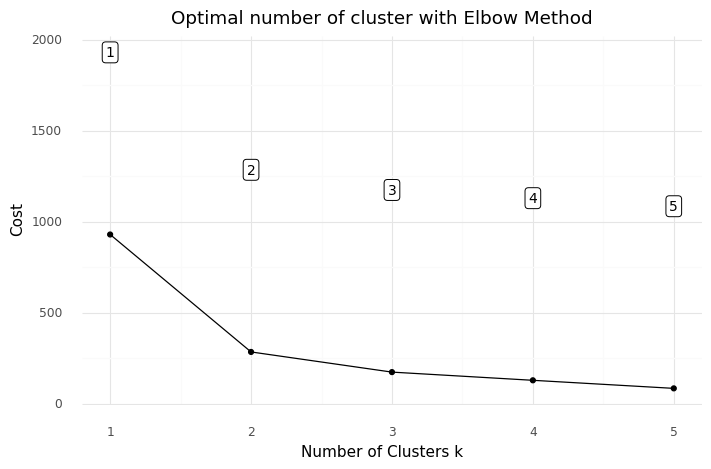

<ggplot: (8787110133237)>

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=uint16)

In [ ]:
# Add the cluster to the dataframe
dataset_62['Cluster Labels'] = kprototype.labels_

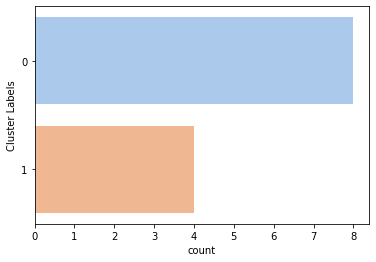

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = dataset_62, y = 'Cluster Labels' ,palette="pastel")

In [ ]:
summary_62 = dataset_62.iloc[: , [77,78]]

summary_62 = summary_62.sort_values(by='Cluster Labels')
summary_62

,disorder,Cluster Labels
1,Dementia,0
2,Alcoholic,0
3,Addicted to other drugs,0
7,Intellectual Disabilities,0
8,Learning Disabilities,0
9,Autistic Disorder,0
10,ADHD,0
11,Self-Harm,0
4,Schizophrenia,1
5,Depression,1


#### Dataset 63

In [ ]:
dfMatrix = dataset_63.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 6), 'Cost':cost})

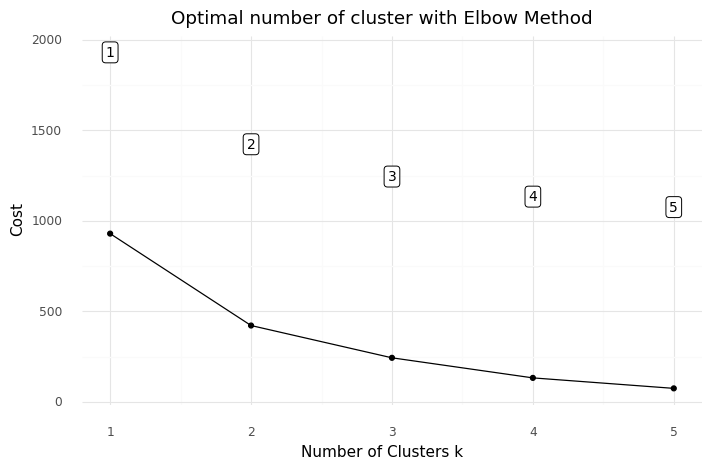

<ggplot: (8787110070137)>

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 2,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=uint16)

In [ ]:
# Add the cluster to the dataframe
dataset_63['Cluster Labels'] = kprototype.labels_

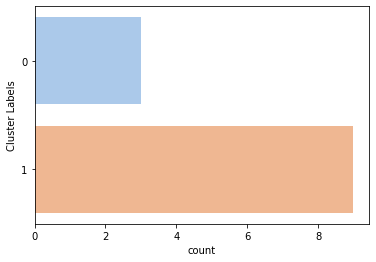

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = dataset_63, y = 'Cluster Labels' ,palette="pastel")

In [ ]:
summary_63 = dataset_63.iloc[: , [77,78]]

summary_63 = summary_63.sort_values(by='Cluster Labels')
summary_63

,disorder,Cluster Labels
4,Schizophrenia,0
5,Depression,0
6,Anxiety Disorder,0
1,Dementia,1
2,Alcoholic,1
3,Addicted to other drugs,1
7,Intellectual Disabilities,1
8,Learning Disabilities,1
9,Autistic Disorder,1
10,ADHD,1


#### Dataset 64

In [ ]:
dfMatrix = dataset_64.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [77])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4


In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})

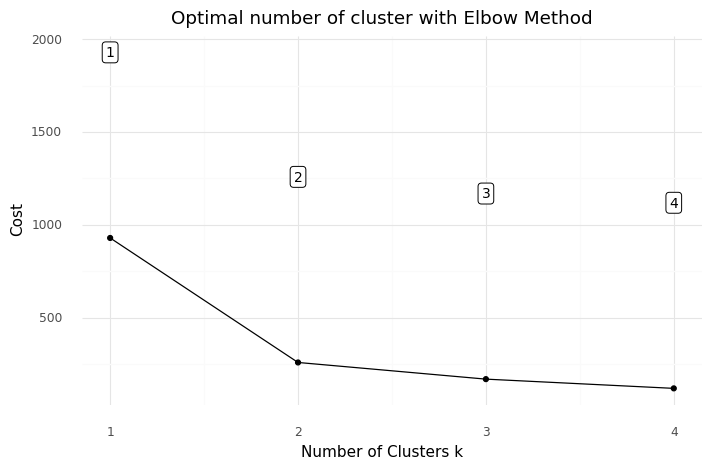

<ggplot: (8787110215465)>

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [77])

array([2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0], dtype=uint16)

In [ ]:
# Add the cluster to the dataframe
dataset_64['Cluster Labels'] = kprototype.labels_

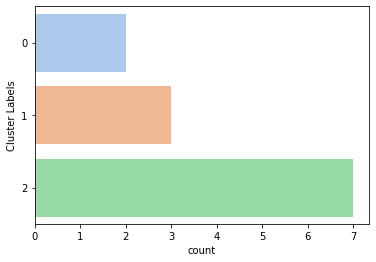

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = dataset_64, y = 'Cluster Labels' ,palette="pastel")

In [ ]:
summary_64 = dataset_64.iloc[: , [77,78]]

summary_64 = summary_64.sort_values(by='Cluster Labels')
summary_64

,disorder,Cluster Labels
2,Alcoholic,0
12,Epilepsy,0
4,Schizophrenia,1
5,Depression,1
6,Anxiety Disorder,1
1,Dementia,2
3,Addicted to other drugs,2
7,Intellectual Disabilities,2
8,Learning Disabilities,2
9,Autistic Disorder,2


### final dataset

In [ ]:
dfMatrix = final_dataset.to_numpy()

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster,  random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = [0, 2])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})

In [ ]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3,  random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = [0, 2])

In [ ]:
# Add the cluster to the dataframe
final_dataset['Cluster Labels'] = kprototype.labels_
final_dataset['Segment'] = final_dataset['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third', 3:'Fourth'})
final_dataset

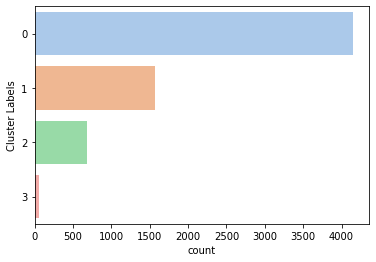

In [ ]:
# กราฟแสดงจำนวนแต่ละ cluster
import seaborn as sns
cluster_count_plot = sns.countplot(data = final_dataset, y = 'Cluster Labels',palette="pastel")

In [ ]:
# Cluster interpretation
final_dataset.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
final_dataset.groupby('Segment').agg(
    {
        'Total':'count',
        'province': lambda x: x.value_counts().index[0],
        'disorder': lambda x: x.value_counts().index[0],
        'frequency': 'mean'
    }
).reset_index()

,Segment,Total,province,disorder,frequency
0,First,4155,Bangkok Metropolis,Self-Harm,45.144
1,Fourth,58,Chai Nat,Schizophrenia,1595.050
2,Second,1569,Maha Sarakham,Depression,323.703
3,Third,686,Lamphun,Anxiety Disorder,670.238


In [ ]:
colors = ['#574E83', '#B24A4B', '#FF847C', '#FFB37F', '#FF487E', '#7C73E6', '#3E84A8', '#29CDB5', '#6A9C77', '#FEC93B', '#54B2F5', '#C5CD78']

In [ ]:
first_segment = final_dataset.loc[final_dataset['Segment'] == 'First']

first_segment.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
first_segment = first_segment.groupby('disorder').agg(
    {
        'Total':'count',
        'province': lambda x: x.value_counts().index[0],
        'frequency': 'mean'
    }).reset_index()
first_segment

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,disorder,Total,province,frequency
0,ADHD,368,Bangkok Metropolis,49.700
1,Addicted to other drugs,362,Phetchaburi,65.328
2,Alcoholic,311,Bangkok Metropolis,65.676
3,Anxiety Disorder,25,Bangkok Metropolis,106.896
4,Autistic Disorder,518,Amnat Charoen,36.929
5,Dementia,533,Amnat Charoen,43.838
6,Depression,21,Bangkok Metropolis,132.461
7,Epilepsy,369,Bangkok Metropolis,71.493
8,Intellectual Disabilities,534,Amnat Charoen,32.343
9,Learning Disabilities,535,Amnat Charoen,27.524


<BarContainer object of 12 artists>

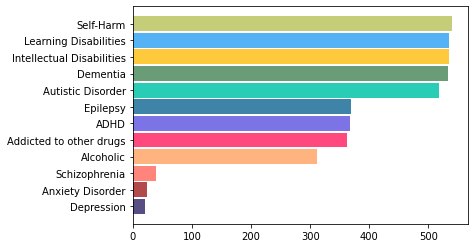

In [ ]:
first_segment = first_segment.sort_values(by=['Total'])
plt.barh(first_segment['disorder'], first_segment['Total'], height=0.9, color =colors)

In [ ]:
second_segment = final_dataset.loc[final_dataset['Segment'] == 'Second']

second_segment.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
second_segment = second_segment.groupby('disorder').agg(
    {
        'Total':'count',
        'province': lambda x: x.value_counts().index[0],
        'frequency': 'mean'
    }).reset_index()
second_segment

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,disorder,Total,province,frequency
0,ADHD,165,Nan,318.741
1,Addicted to other drugs,149,Chiang Rai,282.686
2,Alcoholic,147,Si Sa Ket,315.724
3,Anxiety Disorder,250,Prachuap Khiri Khan,345.045
4,Autistic Disorder,21,Lampang,265.048
5,Dementia,6,Sing Buri,248.805
6,Depression,371,Roi Et,357.342
7,Epilepsy,170,Chanthaburi,249.266
8,Intellectual Disabilities,5,Lamphun,260.887
9,Learning Disabilities,4,Lamphun,233.098


<BarContainer object of 11 artists>

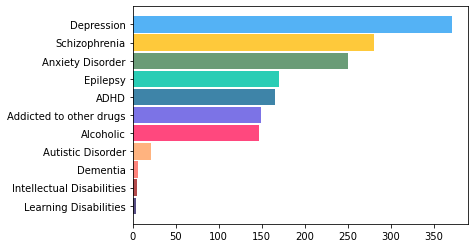

In [ ]:
second_segment = second_segment.sort_values(by=['Total'])
plt.barh(second_segment['disorder'], second_segment['Total'], height=0.9, color =colors)

In [ ]:
third_segment = final_dataset.loc[final_dataset['Segment'] == 'Third']

third_segment.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
third_segment = third_segment.groupby('disorder').agg(
    {
        'Total':'count',
        'province': lambda x: x.value_counts().index[0],
        'frequency': 'mean'
    }).reset_index()
third_segment

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,disorder,Total,province,frequency
0,ADHD,6,Chiang Mai,539.119
1,Addicted to other drugs,18,Buri Ram,642.107
2,Alcoholic,64,Uthai Thani,670.145
3,Anxiety Disorder,252,Rayong,692.941
4,Depression,146,Ang Thong,634.114
5,Schizophrenia,200,Nakhon Phanom,674.498


<BarContainer object of 6 artists>

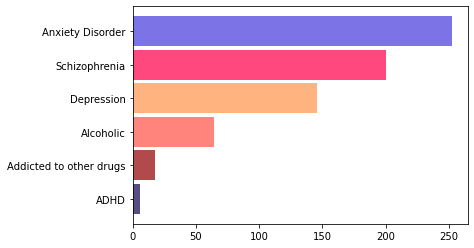

In [ ]:
third_segment = third_segment.sort_values(by=['Total'])
plt.barh(third_segment['disorder'], third_segment['Total'], height=0.9, color =colors)

In [ ]:
fourth_segment = final_dataset.loc[final_dataset['Segment'] == 'Fourth']

fourth_segment.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
fourth_segment = fourth_segment.groupby('disorder').agg(
    {
        'Total':'count',
        'province': lambda x: x.value_counts().index[0],
        'frequency': 'mean'
    }).reset_index()
fourth_segment

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,disorder,Total,province,frequency
0,Addicted to other drugs,10,Sakon Nakhon,1927.398
1,Alcoholic,17,Maha Sarakham,1888.156
2,Anxiety Disorder,12,Chai Nat,1292.480
3,Depression,1,Lamphun,1134.587
4,Schizophrenia,18,Roi Et,1360.885


<BarContainer object of 5 artists>

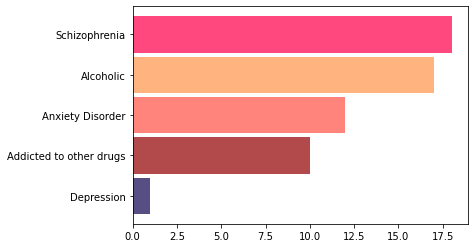

In [ ]:
fourth_segment = fourth_segment.sort_values(by=['Total'])
plt.barh(fourth_segment['disorder'], fourth_segment['Total'], height=0.9, color =colors)



---



### วิธีเก่า

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

VER.1 ใช้ **mental_58-64_data**

In [ ]:
# เปิดไฟล์
import pandas as pd
df_58to64 = pd.read_excel('/content/drive/MyDrive/WIL/mental/data/4.Calculate/12 types of mental_58-64_data_calculated.xlsx')
df_58to64.head()

,Province,Dementia,Alcoholic,Addicted to other drugs,Schizophrenia,Depression,Anxiety Disorder,Intellectual Disabilities,Learning Disabilities,Autistic Disorder,ADHD,Self-Harm,Epilepsy,Male_population,Women_population,Total_population,year
0,Amnat Charoen,12.772921,27.674663,17.828869,829.707686,320.653548,589.151000,7.983076,7.716973,1.330513,0.266103,4.523743,102.449474,49992.149975,50007.850025,100000.0,58.0
1,Amnat Charoen,6.905032,10.888704,18.856049,1375.694819,320.021671,587.990025,3.186938,1.327891,1.859047,0.531156,4.249250,71.971679,49936.925189,50063.074811,100000.0,59.0
2,Amnat Charoen,49.777589,770.228765,280.396103,866.341877,309.786062,568.205889,20.122855,14.562593,20.387630,315.346325,16.680788,57.456047,49914.213090,50085.786910,100000.0,60.0
3,Amnat Charoen,73.747872,1211.685469,423.984183,734.835429,420.812231,760.211041,39.120735,17.974392,75.598177,418.168938,34.362808,61.324395,49874.972245,50125.027755,100000.0,61.0
4,Amnat Charoen,26.158228,281.927571,95.385054,449.445921,510.481787,549.587017,31.442719,34.349189,16.381921,89.043666,14.796574,252.862873,49826.404485,50173.595515,100000.0,62.0


In [ ]:
#df_ = df_58to64[df_58to64['year'] == 58]
#df_

In [ ]:
data = df_58to64.iloc[:, 1:13]
data

,Dementia,Alcoholic,Addicted to other drugs,Schizophrenia,Depression,Anxiety Disorder,Intellectual Disabilities,Learning Disabilities,Autistic Disorder,ADHD,Self-Harm,Epilepsy
0,12.772921,27.674663,17.828869,829.707686,320.653548,589.151000,7.983076,7.716973,1.330513,0.266103,4.523743,102.449474
1,6.905032,10.888704,18.856049,1375.694819,320.021671,587.990025,3.186938,1.327891,1.859047,0.531156,4.249250,71.971679
2,49.777589,770.228765,280.396103,866.341877,309.786062,568.205889,20.122855,14.562593,20.387630,315.346325,16.680788,57.456047
3,73.747872,1211.685469,423.984183,734.835429,420.812231,760.211041,39.120735,17.974392,75.598177,418.168938,34.362808,61.324395
4,26.158228,281.927571,95.385054,449.445921,510.481787,549.587017,31.442719,34.349189,16.381921,89.043666,14.796574,252.862873
...,...,...,...,...,...,...,...,...,...,...,...,...
534,42.246240,346.863865,347.605027,960.546088,671.863448,719.112532,11.302722,10.932141,20.567248,351.125547,19.826086,26.311255
535,42.294436,954.963846,298.287075,667.806885,848.856752,549.827669,25.784766,19.106697,61.772137,330.007902,25.599264,34.503356
536,15.427825,333.464067,152.419473,473.801509,426.588648,378.074645,28.810998,10.037380,18.587741,100.373799,11.338522,243.685280
537,20.675627,121.632294,213.275615,353.534601,407.924540,270.459558,26.077368,7.636943,21.793229,71.526495,14.156285,84.565179


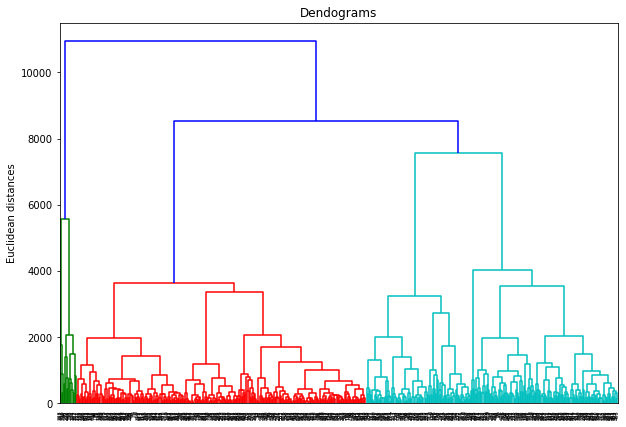

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Dendograms")
#plt.xlabel('')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

แบ่งได้ 4 clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 1, 1, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 3, 3,
       0, 0, 2, 2, 2, 3, 3, 1, 0, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 0,
       1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 1, 1,
       2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       2, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2,
       2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       3, 3, 1, 1, 2, 2, 2, 3, 2, 0, 0, 2, 0, 2, 3, 3, 3, 1, 2, 2, 2, 2,
       3, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3,
       1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1,
       1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 1, 0, 2,
       2, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 2, 2, 2,